# 1. Time Series Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df['Date'] = pd.to_datetime(df['Date'])

In [3]:
# converting date into index
stock_data = pd.read_csv(r"/content/NIFTY 50_Historical_PR_01012013to05062025.csv",parse_dates=['Date'],index_col='Date')
stock_data.head(2)

,Index Name,Open,High,Low,Close
Date,,,,,
2025-06-04,NIFTY 50,24560.45,24644.25,24530.45,24620.2
2025-06-03,NIFTY 50,24786.30,24845.10,24502.15,24542.5


In [4]:
stock_data = stock_data.sort_index()
stock_data

,Index Name,Open,High,Low,Close
Date,,,,,
2013-01-01,NIFTY 50,5937.65,5963.90,5935.20,5950.85
2013-01-02,NIFTY 50,5982.60,6006.05,5982.00,5993.25
2013-01-03,NIFTY 50,6015.80,6017.00,5986.55,6009.50
2013-01-04,NIFTY 50,6011.95,6020.75,5981.55,6016.15
2013-01-07,NIFTY 50,6042.15,6042.15,5977.15,5988.40
...,...,...,...,...,...
2025-05-29,NIFTY 50,24825.10,24892.60,24677.30,24833.60
2025-05-30,NIFTY 50,24812.60,24863.95,24717.40,24750.70
2025-06-02,NIFTY 50,24669.70,24754.40,24526.15,24716.60


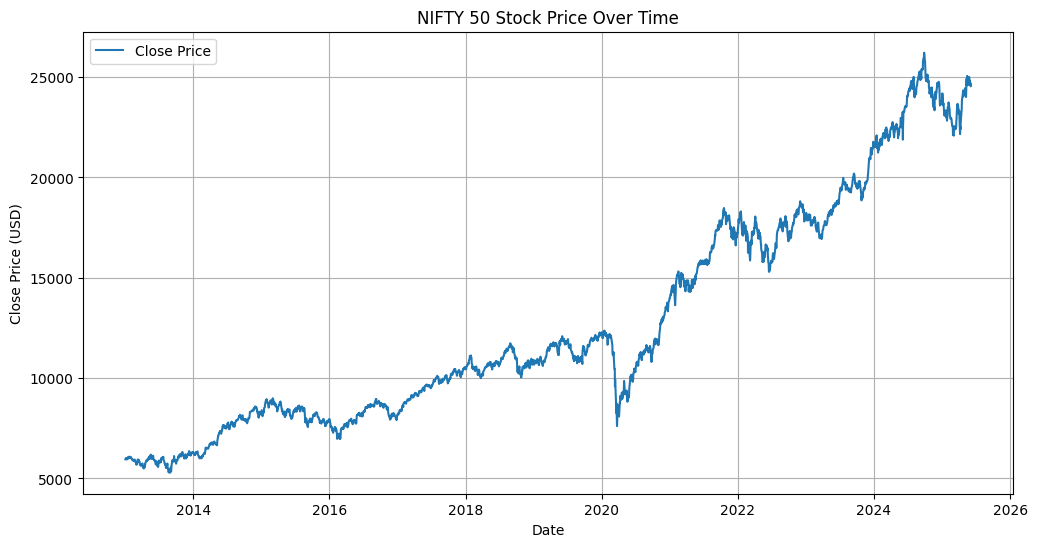

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'],label='Close Price')
plt.title('NIFTY 50 Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# SEASONAL DECOMPOSTION

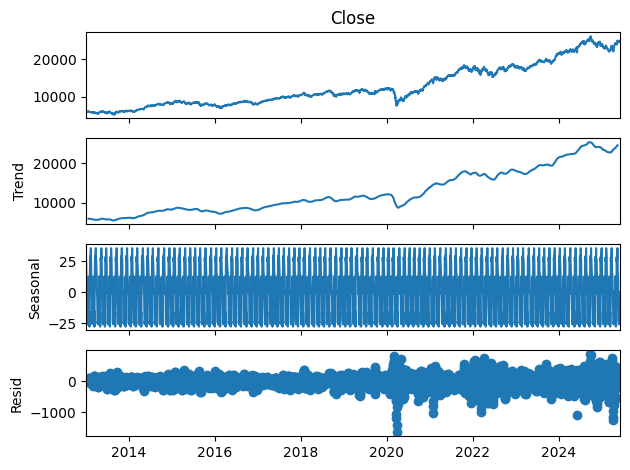

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'], model='additive', period=30)
result.plot()
plt.show()

# Stationarity Test

In [7]:
# stationary means mean, median & Constant overtime

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(stock_data['Close'])
print('ADF Test Results')
print(f'ADF Statsitic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('critical values:')
adf_test[4]

ADF Test Results
ADF Statsitic: 0.5312528108924313
p-value: 0.9857926752274863
critical values:


{'1%': np.float64(-3.4324783795975273),
 '5%': np.float64(-2.862480384112223),
 '10%': np.float64(-2.5672705897547754)}

In [22]:
0.5312528108924313 < 0.05

# It is non stationary data

False

# Making Data Stationary

In [10]:
stock_diff = stock_data['Close'].diff().dropna()

In [11]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(stock_diff)
print('ADF Test Results')
print(f'ADF Statsitic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('critical values:')
adf_test[4]

ADF Test Results
ADF Statsitic: -14.131844957614561
p-value: 2.3262815215678478e-26
critical values:


{'1%': np.float64(-3.4324888216026417),
 '5%': np.float64(-2.862484996057603),
 '10%': np.float64(-2.5672730450894954)}

In [23]:
2.3262815215678478e-26 < 0.05

True

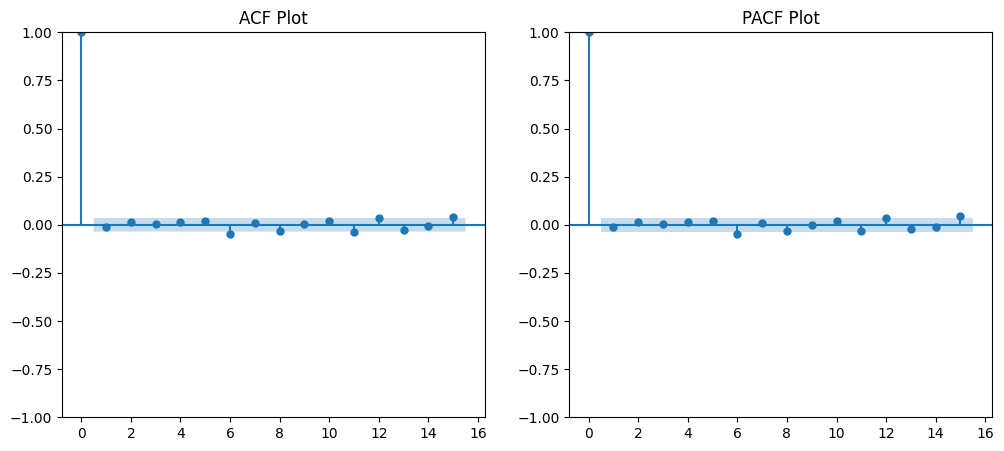

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(stock_diff, lags=15, ax=axes[0])
plot_pacf(stock_diff, lags=15, method='ywm', ax=axes[1])
axes[0].set_title("ACF Plot")
axes[1].set_title("PACF Plot")
plt.show()

# Train test split

In [14]:
# 80-20 split (common practice):
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

# ARIMA

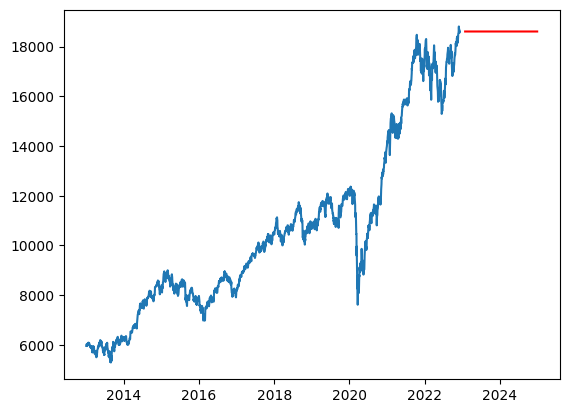

In [15]:
model = sm.tsa.ARIMA(train['Close'], order=(1, 1, 1))
result = model.fit()

forecast = result.get_forecast(steps=24)
forecast_index = pd.date_range(train.index[-1], periods=25, freq='M')[1:]

plt.plot(train.index, train['Close'])
plt.plot(forecast_index, forecast.predicted_mean, 'r')
plt.show()


# SARIMA

In [16]:
print(len(forecast.predicted_mean))
len(test['Close'])

24


616

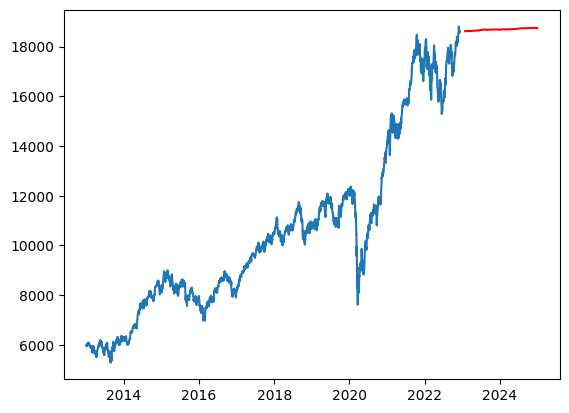

In [17]:
model = sm.tsa.statespace.SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
# print(sarima_result.summary())

forecast = result.get_forecast(steps=24)
forecast_index = pd.date_range(train.index[-1], periods=25, freq='M')[1:]

plt.plot(train.index, train['Close'])
plt.plot(forecast_index, forecast.predicted_mean, 'r')
plt.show()


# Note: step 24 means 2 year. and jitne year ki value hogi periods ko +1 rkna hai

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['Close'][:24], forecast.predicted_mean))
print(f"RMSE: {rmse:.4f}")

RMSE: 564.0960


# FB prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoex5yq_h/mwo9w0gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoex5yq_h/b3rf5p5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78648', 'data', 'file=/tmp/tmpoex5yq_h/mwo9w0gh.json', 'init=/tmp/tmpoex5yq_h/b3rf5p5y.json', 'output', 'file=/tmp/tmpoex5yq_h/prophet_modelzjcuyk3i/prophet_model-20250605140620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


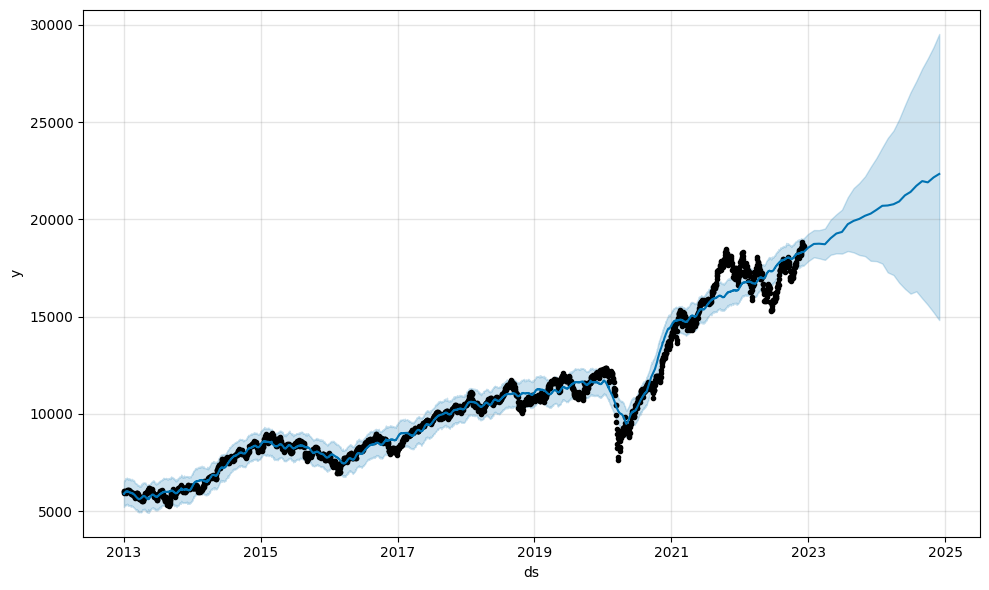

In [20]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Prophet ke liye data rename krna padta hai
df = train.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.show()


# Using LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


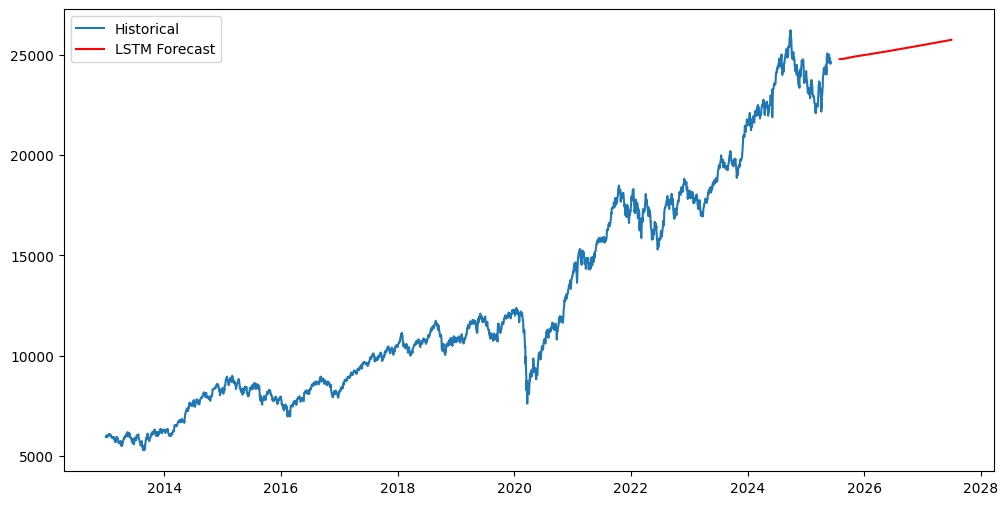

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = stock_data['Close'].values.reshape(-1,1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM (look_back = 12 months)
look_back = 12
X, y = [], []
for i in range(len(data_scaled) - look_back):
    X.append(data_scaled[i:i+look_back, 0])
    y.append(data_scaled[i+look_back, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # reshape for LSTM [samples, timesteps, features]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=20, batch_size=16, verbose=0)

# Forecast next 24 months
forecast_input = data_scaled[-look_back:].reshape(1, look_back, 1)
forecast_scaled = []

for _ in range(24):
    pred = model.predict(forecast_input)[0,0]
    forecast_scaled.append(pred)
    forecast_input = np.append(forecast_input[:,1:,:], [[[pred]]], axis=1)

forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1,1))

# Create forecast index
forecast_index = pd.date_range(stock_data.index[-1], periods=25, freq='M')[1:]

# Plot
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='Historical')
plt.plot(forecast_index, forecast, color='red', label='LSTM Forecast')
plt.legend()
plt.show()
